#Import Libraries

In [46]:
!pip install -q transformers
!pip install text2emotion

!pip install plotly

!pip install pyyaml==5.4.1

In [47]:
import numpy as np
import nltk
import pandas as pd
import seaborn as sns
import text2emotion as te
import plotly.express as px
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from transformers import pipeline
from sklearn.feature_extraction.text import CountVectorizer

#import stopwords with nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_nltk = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Get the data

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
#make sure each column, show all the data
pd.set_option('display.max_colwidth', None)

In [50]:
#path = "/content/EmoSent Dataset.csv" <- use this if upload file in the _temporary_ File
path = "/content/drive/MyDrive/FYP Code/Data/Clean Dataset (Symbols & Emojis).csv"  
df = pd.read_csv(path)

#Remove duplicated rows & drop unnecessary rows

In [51]:
df = df.drop_duplicates(subset=['text'], keep='last')

In [52]:
df.drop(['Unnamed: 0', 'id', 'created_at', 'username', 'location', 'following', 'followers', 'retweet_count'], inplace=True, axis=1)

#Check datatype & remove null values

In [54]:
#printing the datatype of the columns
df.dtypes

search_term    object
text           object
dtype: object

In [55]:
#make sure column 'text' is in string datatype
#df = df.astype({"text": str})
df['text'] = df['text'].astype('string')

#remove null values in the most important column of all
#df.dropna(subset = ["text"], inplace=True)
df = df[df['text'].notna()]

#clear null values from all columns
df = df.dropna(how='any', axis=0)

# Sentiment Annotation

In [56]:
pd.options.mode.chained_assignment = None

In [57]:
sent_pl = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [58]:
results = sent_pl(df['text'].tolist())

In [59]:
print(results)

[{'label': 'NEGATIVE', 'score': 0.9982544779777527}, {'label': 'POSITIVE', 'score': 0.8639581203460693}, {'label': 'NEGATIVE', 'score': 0.9994088411331177}, {'label': 'NEGATIVE', 'score': 0.9972315430641174}, {'label': 'NEGATIVE', 'score': 0.9665834903717041}, {'label': 'POSITIVE', 'score': 0.5485259294509888}, {'label': 'NEGATIVE', 'score': 0.9857991933822632}, {'label': 'POSITIVE', 'score': 0.9949398040771484}, {'label': 'NEGATIVE', 'score': 0.9852616190910339}, {'label': 'POSITIVE', 'score': 0.9972115159034729}, {'label': 'NEGATIVE', 'score': 0.9982566237449646}, {'label': 'POSITIVE', 'score': 0.9727247357368469}, {'label': 'NEGATIVE', 'score': 0.9939519762992859}, {'label': 'POSITIVE', 'score': 0.6890512704849243}, {'label': 'NEGATIVE', 'score': 0.9861745834350586}, {'label': 'POSITIVE', 'score': 0.9566555023193359}, {'label': 'POSITIVE', 'score': 0.8929397463798523}, {'label': 'NEGATIVE', 'score': 0.98933345079422}, {'label': 'POSITIVE', 'score': 0.9984610080718994}, {'label': 'NE

In [60]:
print(type(results))

<class 'list'>


In [61]:
#declare empty lists
labels = [] 
scores = [] 

#append results
for result in results:
  l = result['label']
  s = result['score']
  labels.append(l)
  scores.append(s)

print(labels)
print(scores)

['NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'PO

In [62]:
#declare a list that is to be converted into a column
sentiment = labels
sentiment_score = scores
 
# Using 'sentiment' and 'sentiment_score' as the column name and equating it to the list
df['sentiment'] = sentiment
df['sentiment_score'] = sentiment_score

#Emotion Annotation

In [64]:
#assign percentage of each emotion to each tweet
df['emotion'] = df.text.apply(lambda x: te.get_emotion(x))

In [65]:
#expanding the dictionary into 5 different columns, based on the dictionary keys
df = pd.concat([df, pd.DataFrame(df['emotion'].tolist())], axis =1)

In [68]:
df = df.drop(['emotion'], axis=1)

In [69]:
df = df.rename({'Happy': 'happy', 'Angry': 'angry', 'Sad': 'sad', 'Fear': 'fear', 'Surprise': 'surprise'}, axis=1)

#Plot figures

In [27]:
#histogram for sentiment frequency
fig = px.histogram(df, x="sentiment", nbins=50, 
                   color="sentiment", color_discrete_sequence=["red", "green"],
                   title="Sentiment Frequency"
                   )
fig.show()

In [28]:
#box plot for sentiment score vs sentiment
fig = px.box(df, x="sentiment", y="sentiment_score", 
             color="sentiment", color_discrete_sequence=["red", "green"],
             title="Sentiment score vs Sentiment")
fig.show()

In [29]:
#histogram for sentiment score
fig = px.histogram(df, x="sentiment_score", nbins=50, color="sentiment")
fig.show()

In [30]:
#histogram for each emotion
fig = px.histogram(df, x=["happy","angry", "surprise", "sad", "fear"], nbins=50,
                   template="simple_white",
                   title="Each emotion Frequency")
fig.show()

In [31]:
#calculate sum and mean of emotions
total_emotions = df[['happy', 'angry', 'surprise', 'sad', 'fear', 'sentiment']].groupby('sentiment').sum()
mean_emotions = df[['happy', 'angry', 'surprise', 'sad', 'fear', 'sentiment']].groupby('sentiment').mean()

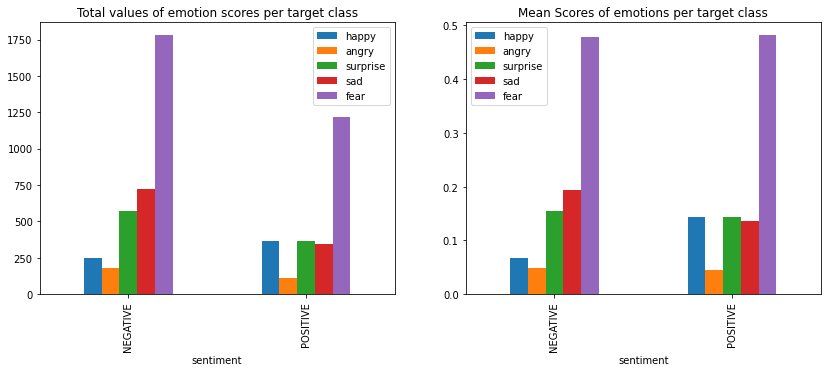

In [32]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
ax1 = total_emotions.plot(kind='bar', ax = axes[0])
ax1.set_title('Total values of emotion scores per target class')
ax2 = mean_emotions.plot(kind='bar', ax = axes[1])
ax2.set_title('Mean Scores of emotions per target class');

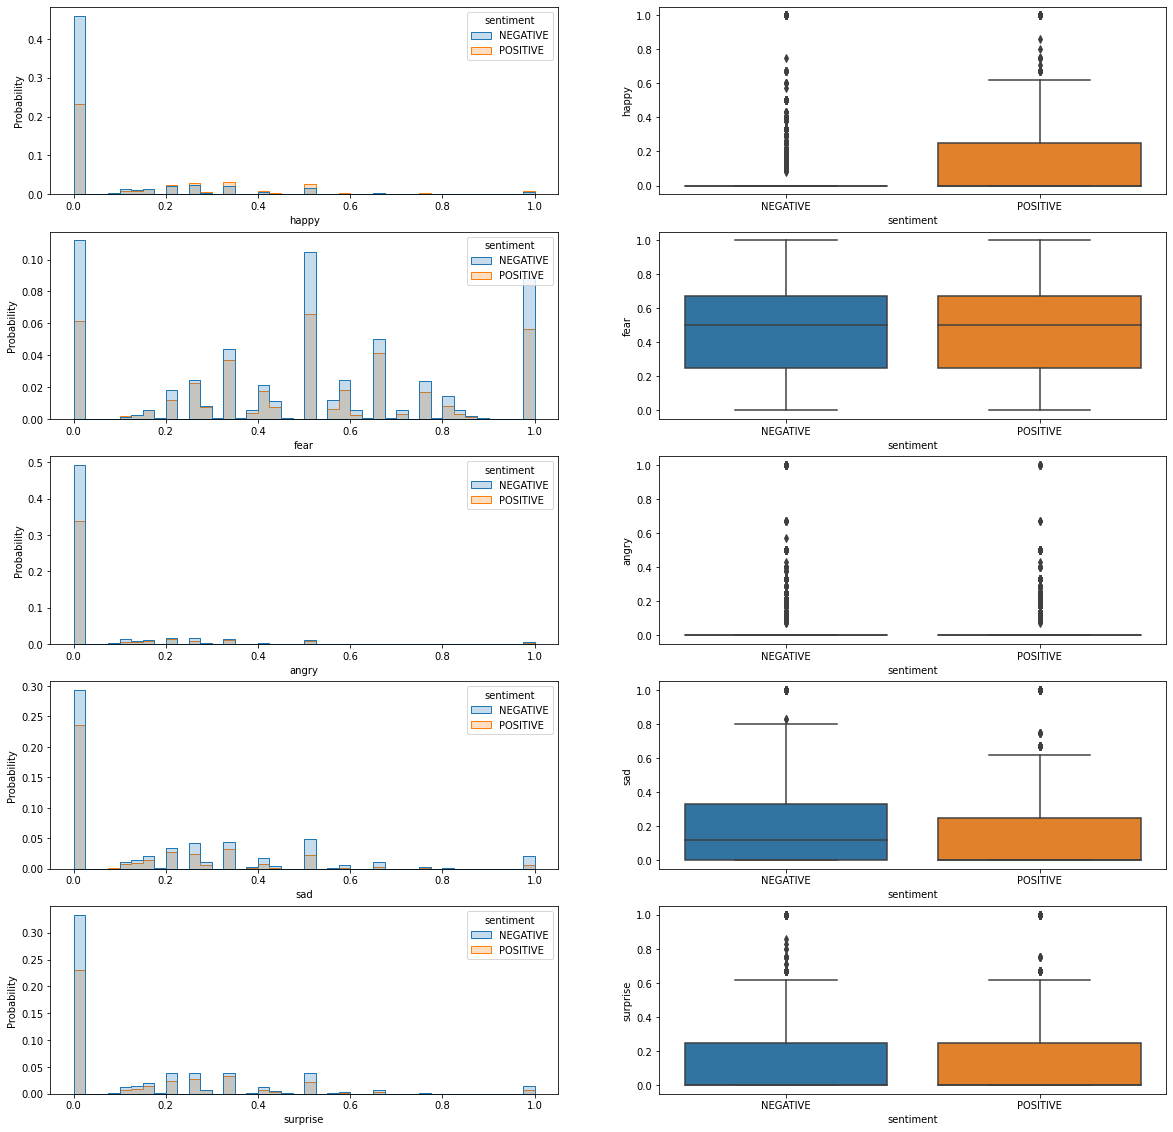

In [33]:
fig, axes = plt.subplots(5,2,figsize=(20,20))
sns.histplot(data = df, 
             x= 'happy',  
             hue = 'sentiment',
             element='step',
             stat='probability',
            bins=40,
            ax=axes[0,0])
sns.boxplot(data = df, x = 'sentiment', y = 'happy',ax=axes[0,1])
sns.histplot(data = df, 
             x= 'fear',  
             hue = 'sentiment',
             element= 'step',
             stat= 'probability',
            bins= 40,
            ax=axes[1,0])
sns.boxplot(data = df, x = 'sentiment', y = 'fear',ax=axes[1,1])
sns.histplot(data = df, 
             x= 'angry',  
             hue = 'sentiment',
             element= 'step',
             stat= 'probability',
            bins= 40,
            ax=axes[2,0])
sns.boxplot(data = df, x = 'sentiment', y = 'angry',ax=axes[2,1])
sns.histplot(data = df, 
             x= 'sad',  
             hue = 'sentiment',
             element= 'step',
             stat= 'probability',
            bins= 40,
            ax=axes[3,0])
sns.boxplot(data = df, x = 'sentiment', y = 'sad',ax=axes[3,1])
sns.histplot(data = df, 
             x= 'surprise',  
             hue = 'sentiment',
             element= 'step',
             stat= 'probability',
            bins= 40,
            ax=axes[4,0])
sns.boxplot(data = df, x = 'sentiment', y = 'surprise',ax=axes[4,1])

In [39]:
#replace amp with and
df['text'] = df['text'].replace('amp', 'and', regex=True)
#remove stopwords in text
df['remstopwords_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_nltk)]))

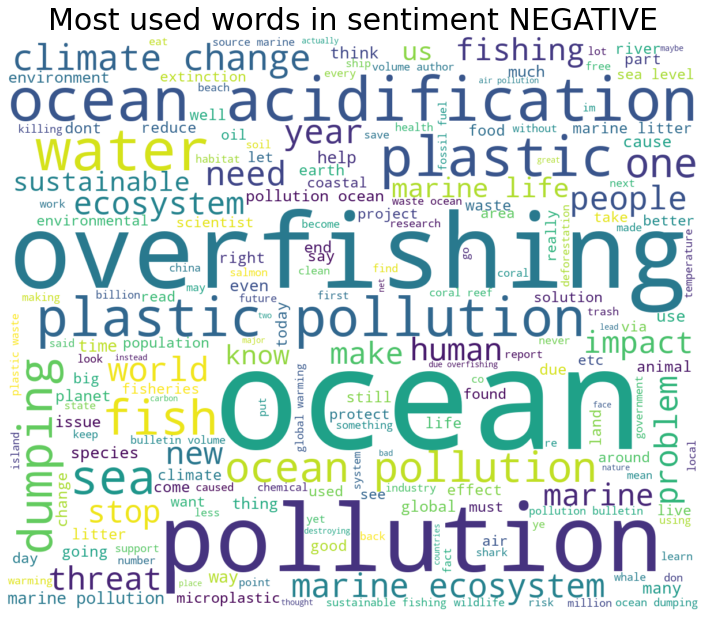

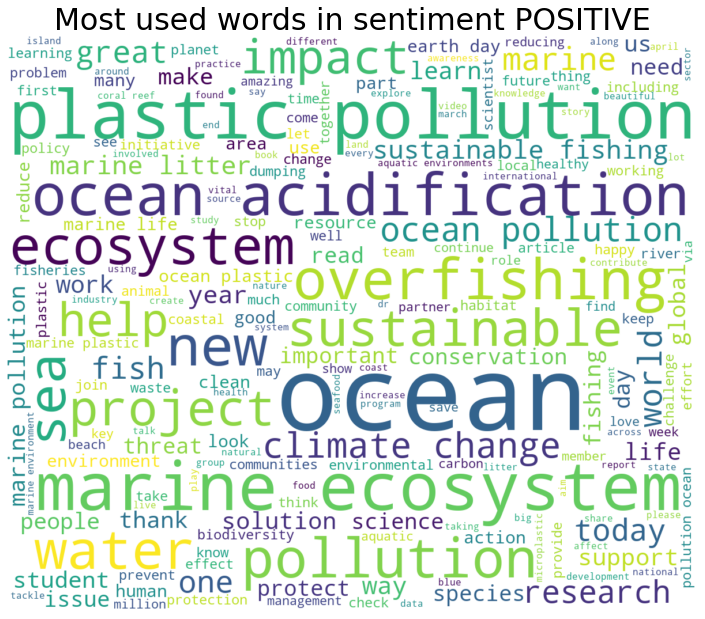

In [40]:
#function for wordcloud
def wordcloud_generator (data, title = None):
  wordcloud = WordCloud(width = 1200, height = 1000,
                        background_color = 'white',
                        min_font_size = 10
                        ).generate(" ".join(data.values))

  #plot the WordCloud image
  plt.figure(figsize = (10,8), facecolor = None)
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title(title, fontsize = 30)
  plt.show()

#create wordcloud for each sentiment
sentiment = np.unique(df['sentiment'])
for c in sentiment:
  senTw = df[df['sentiment'] == c]
  wordcloud_generator(senTw['remstopwords_text'], title = "Most used words in sentiment " + str(c))

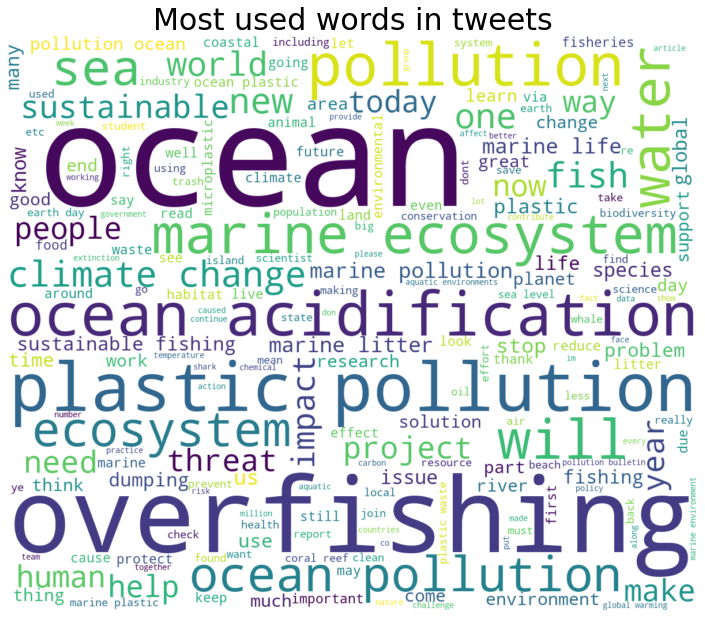

In [41]:
#wordcloud for tweets before removinng stopwords
wordcloud_generator(df['text'], title = "Most used words in tweets")

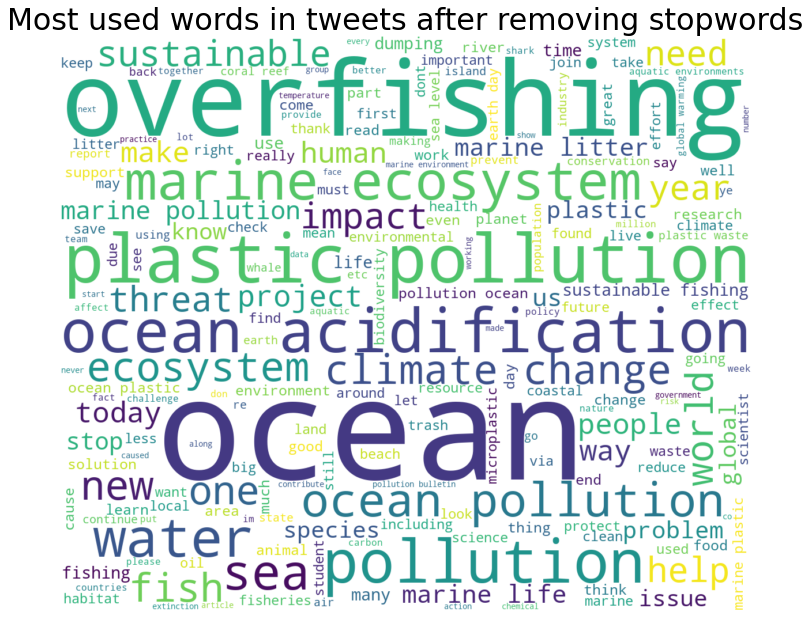

In [42]:
#wordcloud for tweets after removing stopwords
wordcloud_generator(df['remstopwords_text'], title = "Most used words in tweets after removing stopwords")

[Text(0.5, 1.0, 'Top 20 words in tweets after removing stop words')]

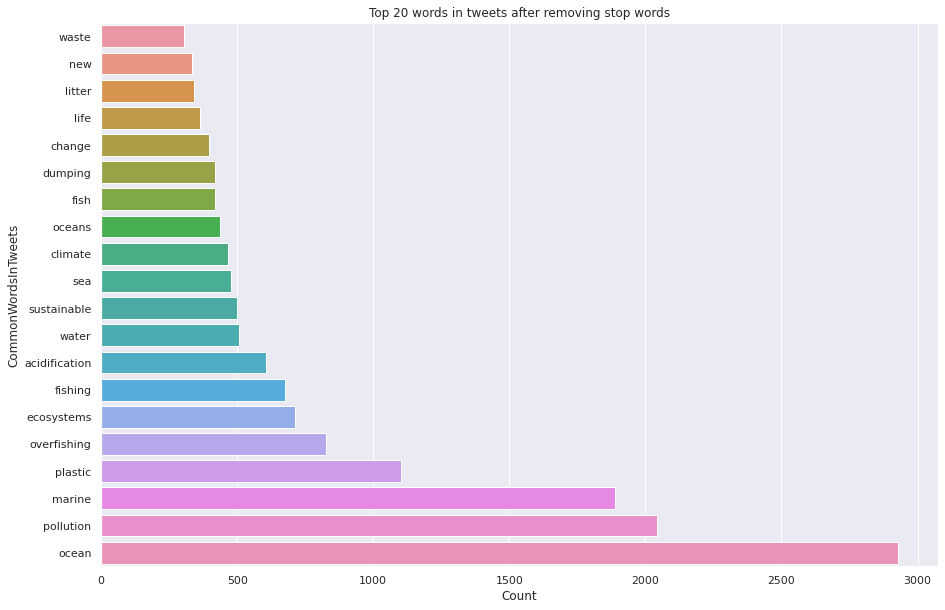

In [43]:
#Horizontal bar graph for top 20 words in tweets after removing stopwords
def get_top_n_words_outstopwords(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words_outstopwords(df['text'], 20)

df_comwords = pd.DataFrame(common_words, columns = ['CommonWordsInTweets' , 'Count'])

sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x = 'Count',
            y = 'CommonWordsInTweets',
            data = df_comwords,
            order=df_comwords.sort_values('Count',ascending = True).CommonWordsInTweets).set(title='Top 20 words in tweets after removing stop words')

In [44]:
#Horizontal bar graph for top 20 bigrams in tweets after removing stopwords
def get_top_n_bigram_outstopwords(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram_outstopwords(df['text'], 20)

df_comwords = pd.DataFrame(common_words, columns = ['CommonBigramInTweets' , 'Count'])

fig = px.bar(df_comwords,
             x = 'Count',
             y = 'CommonBigramInTweets',
             title = 'Top 20 Bigrams In Tweets After Removing Stop Words')

fig.update_traces(marker_color='#C1DEAE')

fig.show()

In [45]:
#Horizontal bar graph for top 20 trigrams in tweets after removing stopwords
def get_top_n_trigram_outstopwords(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram_outstopwords(df['text'], 20)

df_comwords = pd.DataFrame(common_words, columns = ['CommonTrigramInTweets' , 'Count'])

fig = px.bar(df_comwords,
             x = 'Count',
             y = 'CommonTrigramInTweets',
             title = 'Top 20 Trigrams In Tweets After Removing Stop Words')

fig.update_traces(marker_color='#C1DEAE')

fig.show()

#Save file

In [ ]:
filename = 'ocean.csv'
df.to_csv(filename, encoding='utf-8-sig') 

#Miscellaneous

In [ ]:
#df.loc[df['sentiment'] == 'POSITIVE', 'sentimentInt'] = 1
#df.loc[df['sentiment'] == 'NEGATIVE', 'sentimentInt'] = 0
#df['sentiment'] = df['sentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})
#df = df.drop(['sentiment'], axis=1)